## Logistic Regression

Breast Cancer data from [the UCI repository](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) contains records corresponding to 
cases of observed tumors.   There are a number of observations for each and a categorisation in the `class` column: 2 for benign (good), 4 for malignant (bad).  Your task is to build a logistic regression model to classify these cases. 

The data is provided as a CSV file.  There are a small number of cases where no value is available, these are indicated in the data with `?`. I have used the `na_values` keyword for `read_csv` to have these interpreted as `NaN` (Not a Number).  Your first task is to decide what to do with these rows. You could just drop these rows or you could [impute them from the other data](http://scikit-learn.org/stable/modules/preprocessing.html#imputation-of-missing-values).

You then need to follow the procedure outlined in the lecture for generating a train/test set, building and evaluating a model. Your goal is to build the best model possible over this data.   Your first step should be to build a logistic regression model using all of the features that are available.
  

In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
import warnings; warnings.simplefilter('ignore')

In [209]:
b_cancer = pd.read_csv("data/breast-cancer-wisconsin.csv", na_values="?",index_col="class")
b_cancer.head()

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
class,,,,,,,,,,
2,1000025,5,1,1,1,2,1.0,3,1,1
2,1002945,5,4,4,5,7,10.0,3,2,1
2,1015425,3,1,1,1,2,2.0,3,1,1
2,1016277,6,8,8,1,3,4.0,3,7,1
2,1017023,4,1,1,3,2,1.0,3,1,1


In [210]:
b_cancer.describe()

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [211]:
b_cancer.shape

(699, 10)

# Ananlysis

Cancer file has 699 rows and 11 columns

sample_code_number              0
clump_thickness                 0
uniformity_cell_size            0
uniformity_cell_shape           0
marginal_adhesion               0
single_epithelial_cell_size     0
bare_nuclei                    16
bland_chromatin                 0
normal_nucleoli                 0
mitoses                         0
dtype: int64

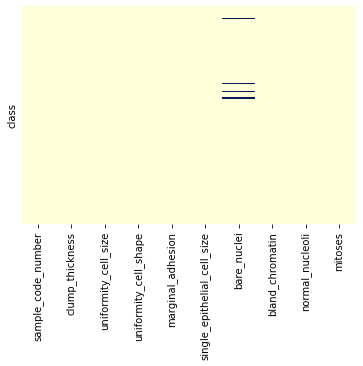

In [212]:
sns.heatmap(b_cancer.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')
b_cancer.isnull().sum()

# Ananlysis
Only one column has nAn values.

In [213]:
clean_bcancer=b_cancer.dropna()
print(clean_bcancer.shape)
print(b_cancer.shape)
clean_bcancer.head()

(683, 10)
(699, 10)


,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
class,,,,,,,,,,
2,1000025,5,1,1,1,2,1.0,3,1,1
2,1002945,5,4,4,5,7,10.0,3,2,1
2,1015425,3,1,1,1,2,2.0,3,1,1
2,1016277,6,8,8,1,3,4.0,3,7,1
2,1017023,4,1,1,3,2,1.0,3,1,1


# Ananlysis

Cancer file without nAN values has 683 rows and 11 columns, rows are dropped.

In [214]:
X=clean_bcancer.iloc[:, :-1]
Y=clean_bcancer.iloc[:,-1]

In [215]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y, test_size=0.2)

# Intrepretation
Here we are divding our data into training and testing data. Because to check the robustness of the model, we train predictive mdoel on one model and then test on other data

In [216]:
print("X train shape:", xtrain.shape)
print("X test shape:", xtest.shape)
print("y train shape:", ytrain.shape)
print("y train shape:", ytest.shape)

X train shape: (546, 9)
X test shape: (137, 9)
y train shape: (546,)
y train shape: (137,)


In [217]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [218]:
ytest.value_counts()

1     113
2       7
4       6
10      5
3       3
8       1
7       1
5       1
Name: mitoses, dtype: int64

### Evaluation

To evaluate a classification model we want to look at how many cases were correctly classified and how many
were in error.  In this case we have two outcomes - benign and malignant.   SKlearn has some useful tools, the 
[accuracy_score]() function gives a score from 0-1 for the proportion correct.  The 
[confusion_matrix](http://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix) function 
shows how many were classified correctly and what errors were made.  Use these to summarise the performance of 
your model (these functions have already been imported above).

In [219]:
# Evaluate the model
y_pred = model.predict(xtest)
print("test accuracy: ", accuracy_score(ytest, y_pred))
print("confusion matrix")
confusion_matrix(ytest,y_pred)

test accuracy:  0.8248175182481752
confusion matrix


array([[113,   0,   0,   0,   0,   0,   0,   0],
       [  7,   0,   0,   0,   0,   0,   0,   0],
       [  3,   0,   0,   0,   0,   0,   0,   0],
       [  6,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0],
       [  5,   0,   0,   0,   0,   0,   0,   0]], dtype=int64)

In [220]:
train_pred=model.predict(xtrain)
print("train accuracy: ", accuracy_score(ytrain,train_pred))

train accuracy:  0.8241758241758241


### Feature Selection

Since you have many features available, one part of building the best model will be to select which features to use as input to the classifier. Your initial model used all of the features but it is possible that a better model can 
be built by leaving some of them out.   Test this by building a few models with subsets of the features - how do your models perform? 

This process can be automated.  The [sklearn RFE function](http://scikit-learn.org/stable/modules/feature_selection.html#recursive-feature-elimination) implements __Recursive Feature Estimation__ which removes 
features one by one, evaluating the model each time and selecting the best model for a target number of features.  Use RFE to select features for a model with 3, 4 and 5 features - can you build a model that is as good or better than your initial model?

In [221]:
from sklearn.feature_selection import RFE
model=LogisticRegression()
rfe= RFE(estimator=model, n_features_to_select=5, step=1)
rfe.fit(xtrain,ytrain)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=5, step=1, verbose=0)

In [222]:
y_pred=rfe.predict(xtest)
print("accuracy score with  5 features: ", accuracy_score(ytest,y_pred))
print(confusion_matrix(ytest,y_pred))

accuracy score with  5 features:  0.8248175182481752
[[113   0   0   0   0   0   0   0]
 [  7   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0]
 [  6   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0]
 [  5   0   0   0   0   0   0   0]]


In [223]:
print(rfe.support_)
print(xtrain.columns)

[ True  True False  True False False  True  True False]
Index(['sample_code_number', 'clump_thickness', 'uniformity_cell_size',
       'uniformity_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
       'normal_nucleoli'],
      dtype='object')


In [224]:
model=LogisticRegression()
rfe= RFE(estimator=model, n_features_to_select=5, step=1)
rfe.fit(xtrain,ytrain)
y_pred=rfe.predict(xtest)
print("accuracy score with 4 features: ", accuracy_score(ytest,y_pred))
print(confusion_matrix(ytest,y_pred))

accuracy score with 4 features:  0.8248175182481752
[[113   0   0   0   0   0   0   0]
 [  7   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0]
 [  6   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0]
 [  5   0   0   0   0   0   0   0]]


## Conclusion

Write a brief conclusion to your experiment.  You might comment on the proportion of __false positive__ and __false negative__ classifications your model makes.  How useful would this model be in a clinical diagnostic setting? 